**" Social Meia Engagement Analysis "**

**Task 1 -Data Import Setup**

In [1]:
import pandas as pd
# load the csv file
df = pd.read_csv('/content/social_media_engagement_5000.csv')
display(df.head())

,user_id,age,gender,country,post_id,post_type,post_category,likes,comments,shares,watch_time_sec,impression_count,posted_at,follower_count,is_verified,device_type,sentiment,hashtags,engagement_rate
0,25795,43.0,Female,Brazil,496713,image,fitness,7011.0,354.0,1157.0,5726,44650,17-12-2022,81734,False,mobile,negative,#foodie #travel #love,0.190862
1,10860,33.0,Male,Brazil,157326,reel,food,11750.0,2606.0,1807.0,5947,80216,02-06-2023,5963,False,mobile,negative,#fitness,0.201493
2,86820,32.0,Female,UK,109864,text,food,4862.0,344.0,955.0,6946,44858,07-05-2023,501783,False,tablet,positive,#foodie,0.137345
3,64886,51.0,Other,France,848877,text,fitness,5350.0,1083.0,1049.0,229,70455,12-02-2023,480212,False,mobile,negative,#music #foodie #fun,0.106195
4,16265,34.0,Other,UK,449706,image,fitness,12682.0,2735.0,1300.0,4798,6019,23-05-2023,383936,False,mobile,negative,#travel,2.777372


In [2]:
# check/convert data types
df.dtypes

,0
user_id,int64
age,float64
gender,object
country,object
post_id,int64
post_type,object
post_category,object
likes,float64
comments,float64
shares,float64


In [3]:
# convert date columns to date time
date_cols = ['posted_at']
for col in date_cols:
    df[col] = pd.to_datetime(df[col],errors='coerce',format='%d-%m-%Y')

In [4]:
# display the data first 5 records
display(df.head(5))

,user_id,age,gender,country,post_id,post_type,post_category,likes,comments,shares,watch_time_sec,impression_count,posted_at,follower_count,is_verified,device_type,sentiment,hashtags,engagement_rate
0,25795,43.0,Female,Brazil,496713,image,fitness,7011.0,354.0,1157.0,5726,44650,2022-12-17,81734,False,mobile,negative,#foodie #travel #love,0.190862
1,10860,33.0,Male,Brazil,157326,reel,food,11750.0,2606.0,1807.0,5947,80216,2023-06-02,5963,False,mobile,negative,#fitness,0.201493
2,86820,32.0,Female,UK,109864,text,food,4862.0,344.0,955.0,6946,44858,2023-05-07,501783,False,tablet,positive,#foodie,0.137345
3,64886,51.0,Other,France,848877,text,fitness,5350.0,1083.0,1049.0,229,70455,2023-02-12,480212,False,mobile,negative,#music #foodie #fun,0.106195
4,16265,34.0,Other,UK,449706,image,fitness,12682.0,2735.0,1300.0,4798,6019,2023-05-23,383936,False,mobile,negative,#travel,2.777372


**Task-2 Data Cleaning**

**Clean & Missing Data**

In [5]:
# detect missing values isnull, isna
df.isnull().sum()
df.isna().sum()

,0
user_id,0
age,150
gender,150
country,0
post_id,0
post_type,0
post_category,0
likes,150
comments,150
shares,150


In [6]:
# handle Missing Values
#impute numerical columns with median
df['age']=df['age'].fillna(df['age'].median())
df['likes']=df['likes'].fillna(df['likes'].median())
df['comments']=df['comments'].fillna(df['comments'].median())
df['shares']=df['shares'].fillna(df['shares'].median())

In [7]:
# impute categorical columns with mode
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['sentiment'].fillna(df['sentiment'].mode()[0],inplace=True)

/tmp/ipython-input-12160806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df['gender'].mode()[0],inplace=True)
/tmp/ipython-input-12160806.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [8]:
# verify that there are no more missing values
df.isnull().sum()


,0
user_id,0
age,0
gender,0
country,0
post_id,0
post_type,0
post_category,0
likes,0
comments,0
shares,0


**Duplicate Handling **

In [9]:
# identify remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

**Data Formatting **

In [10]:
# fix incorrect data types
df.dtypes

,0
user_id,int64
age,float64
gender,object
country,object
post_id,int64
post_type,object
post_category,object
likes,float64
comments,float64
shares,float64


In [11]:
# standart categories ( gender,labels)
df['gender'].unique()
df['country'].unique()
df['sentiment'].unique()

array(['negative', 'positive', 'neutral'], dtype=object)

In [12]:
# display descriptive statistics for likes comment and shares to identify potential unrealistic values
df[['likes','comments','shares']].describe()

,likes,comments,shares
count,5000.000000,5000.000000,5000.0000
mean,10106.997400,1502.039800,1002.9106
std,5702.293017,856.393312,570.8552
min,10.000000,0.000000,0.0000
25%,5235.000000,792.000000,511.0000
50%,10105.500000,1497.000000,1012.0000
75%,14959.000000,2235.250000,1483.0000
max,19998.000000,2999.000000,1999.0000


**Feature Cleaning **

In [13]:
# extract hastag count
df['hashtag_count'] = df['hashtags'].str.count('#')

In [14]:
display(df[['hashtags','hashtag_count']].head())

,hashtags,hashtag_count
0,#foodie #travel #love,3
1,#fitness,1
2,#foodie,1
3,#music #foodie #fun,3
4,#travel,1


In [15]:
# clean sentiment labels
df['sentiment']=df['sentiment'].str.lower()

In [16]:
# count the occurrences of each sentiment label
df['sentiment'].value_counts()

,count
sentiment,
positive,2513
neutral,1527
negative,960


Task-3 data Exploration
Using Pandas

In [17]:
# view dataset structure useing head,tall,shape,and columns.
#display the first 5 rows
display(df.head())

,user_id,age,gender,country,post_id,post_type,post_category,likes,comments,shares,watch_time_sec,impression_count,posted_at,follower_count,is_verified,device_type,sentiment,hashtags,engagement_rate,hashtag_count
0,25795,43.0,Female,Brazil,496713,image,fitness,7011.0,354.0,1157.0,5726,44650,2022-12-17,81734,False,mobile,negative,#foodie #travel #love,0.190862,3
1,10860,33.0,Male,Brazil,157326,reel,food,11750.0,2606.0,1807.0,5947,80216,2023-06-02,5963,False,mobile,negative,#fitness,0.201493,1
2,86820,32.0,Female,UK,109864,text,food,4862.0,344.0,955.0,6946,44858,2023-05-07,501783,False,tablet,positive,#foodie,0.137345,1
3,64886,51.0,Other,France,848877,text,fitness,5350.0,1083.0,1049.0,229,70455,2023-02-12,480212,False,mobile,negative,#music #foodie #fun,0.106195,3
4,16265,34.0,Other,UK,449706,image,fitness,12682.0,2735.0,1300.0,4798,6019,2023-05-23,383936,False,mobile,negative,#travel,2.777372,1


In [18]:
# display last 5 rows
display(df.tail())

,user_id,age,gender,country,post_id,post_type,post_category,likes,comments,shares,watch_time_sec,impression_count,posted_at,follower_count,is_verified,device_type,sentiment,hashtags,engagement_rate,hashtag_count
4995,59500,44.0,Male,Australia,441541,video,education,16210.0,2013.0,1837.0,6190,42977,2022-06-25,646147,False,mobile,positive,#travel #fun,0.466761,2
4996,22100,38.0,Other,UAE,677076,reel,education,16924.0,2734.0,1583.0,7764,34196,2022-11-18,584603,False,desktop,negative,#foodie #reels,0.621155,2
4997,67021,63.0,Female,USA,273595,text,travel,13487.0,1497.0,167.0,7466,23680,2023-04-06,483550,False,desktop,positive,#lifestyle #tech,0.679688,2
4998,29800,13.0,Female,Germany,785644,video,fitness,16894.0,1289.0,1713.0,4991,89013,2022-05-16,183295,False,tablet,positive,#reels #love #fitness,0.223518,3
4999,73400,54.0,Other,Japan,712252,text,travel,14830.0,503.0,1798.0,3743,14234,2023-03-04,585760,False,desktop,neutral,#foodie #lifestyle #fashion,1.203527,3


In [19]:
# display the shape of the datafrme (rows,columns)
print(f"dataframe shape:{df.shape}")

dataframe shape:(5000, 20)


In [20]:
# display columns names
print("dataframe columns:",df.columns.tolist())

dataframe columns: ['user_id', 'age', 'gender', 'country', 'post_id', 'post_type', 'post_category', 'likes', 'comments', 'shares', 'watch_time_sec', 'impression_count', 'posted_at', 'follower_count', 'is_verified', 'device_type', 'sentiment', 'hashtags', 'engagement_rate', 'hashtag_count']


In [21]:
# check data types and info & dtypes
# data types
print("dataframe data types:")
print(df.dtypes)

dataframe data types:
user_id                      int64
age                        float64
gender                      object
country                     object
post_id                      int64
post_type                   object
post_category               object
likes                      float64
comments                   float64
shares                     float64
watch_time_sec               int64
impression_count             int64
posted_at           datetime64[ns]
follower_count               int64
is_verified                   bool
device_type                 object
sentiment                   object
hashtags                    object
engagement_rate            float64
hashtag_count                int64
dtype: object


In [22]:
# data info
print("\ndataframe info:")
df.info()


dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           5000 non-null   int64         
 1   age               5000 non-null   float64       
 2   gender            5000 non-null   object        
 3   country           5000 non-null   object        
 4   post_id           5000 non-null   int64         
 5   post_type         5000 non-null   object        
 6   post_category     5000 non-null   object        
 7   likes             5000 non-null   float64       
 8   comments          5000 non-null   float64       
 9   shares            5000 non-null   float64       
 10  watch_time_sec    5000 non-null   int64         
 11  impression_count  5000 non-null   int64         
 12  posted_at         5000 non-null   datetime64[ns]
 13  follower_count    5000 non-null   int64         
 14  is_veri

In [23]:
# generate summary statistics using describe ()
display(df.describe())

,user_id,age,post_id,likes,comments,shares,watch_time_sec,impression_count,posted_at,follower_count,engagement_rate,hashtag_count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000
mean,54561.890800,38.440400,548042.909000,10106.997400,1502.039800,1002.9106,4014.503200,50013.732800,2022-12-28 13:21:30.240000,393698.224800,0.964356,1.998600
min,10055.000000,13.000000,100068.000000,10.000000,0.000000,0.0000,0.000000,105.000000,2022-01-01 00:00:00,87.000000,0.006363,1.000000
25%,32309.500000,26.000000,322543.500000,5235.000000,792.000000,511.0000,2017.750000,24988.250000,2022-07-03 18:00:00,194480.000000,0.145781,1.000000
50%,54374.500000,38.000000,548077.500000,10105.500000,1497.000000,1012.0000,4034.500000,49934.500000,2022-12-27 00:00:00,388982.000000,0.253896,2.000000
75%,77180.500000,51.000000,771574.500000,14959.000000,2235.250000,1483.0000,6020.250000,74662.250000,2023-06-28 00:00:00,589744.250000,0.504794,3.000000
max,99963.000000,64.000000,999455.000000,19998.000000,2999.000000,1999.0000,7998.000000,99995.000000,2023-12-31 00:00:00,799533.000000,191.504348,3.000000
std,26090.370121,14.687151,260646.957267,5702.293017,856.393312,570.8552,2308.096459,28844.939104,NaN,230927.884535,5.318029,0.812853


In [24]:
# analyze categorical distributions using value counts unique and nunique
df.select_dtypes(include=['object']).nunique()
df.select_dtypes(include=['number']).nunique()
df.select_dtypes(include=['float']).nunique()
df.select_dtypes(include=['int64']).nunique()

,0
user_id,4862
post_id,4991
watch_time_sec,3690
impression_count,4870
follower_count,4983
hashtag_count,3


In [25]:
# create correlation matrix for numeric fields
numeric_df=df.select_dtypes(include=['number'])
correlation_matrix=numeric_df.corr()
display(correlation_matrix)

,user_id,age,post_id,likes,comments,shares,watch_time_sec,impression_count,follower_count,engagement_rate,hashtag_count
user_id,1.000000,-0.006688,0.020051,0.025811,-0.033395,0.013763,-0.016847,0.015326,0.010124,-0.004282,-0.013692
age,-0.006688,1.000000,-0.013153,-0.036322,-0.007284,0.013871,0.005542,0.013322,-0.024894,0.008039,0.007173
post_id,0.020051,-0.013153,1.000000,0.014526,-0.010540,0.001846,0.018374,-0.007709,-0.002844,0.010139,0.007344
likes,0.025811,-0.036322,0.014526,1.000000,-0.018421,0.004712,0.008710,0.007952,-0.022982,0.093520,-0.002190
comments,-0.033395,-0.007284,-0.010540,-0.018421,1.000000,0.006142,-0.016351,-0.009395,-0.011733,0.000051,-0.015230
shares,0.013763,0.013871,0.001846,0.004712,0.006142,1.000000,0.014658,-0.005204,-0.010783,0.021724,0.013379
watch_time_sec,-0.016847,0.005542,0.018374,0.008710,-0.016351,0.014658,1.000000,-0.004335,0.002761,-0.001148,-0.023301
impression_count,0.015326,0.013322,-0.007709,0.007952,-0.009395,-0.005204,-0.004335,1.000000,-0.015513,-0.232226,-0.002714
follower_count,0.010124,-0.024894,-0.002844,-0.022982,-0.011733,-0.010783,0.002761,-0.015513,1.000000,0.002292,0.008802
engagement_rate,-0.004282,0.008039,0.010139,0.093520,0.000051,0.021724,-0.001148,-0.232226,0.002292,1.000000,0.005319


In [26]:
# use groupby () to summarize metrics (ave likes by post type ,impressions by country)
# average likes by post type
ave_likes_by_post_type=df.groupby('post_type')['likes'].mean()
print("\naverage likes by post type:\n")
display(ave_likes_by_post_type)


average likes by post type:



,likes
post_type,
image,10104.865277
reel,10037.802416
text,10100.148193
video,10188.600000


In [27]:
# total impression by country
total_impressions_by_country=df.groupby('country')['impression_count'].sum()
print("\ntotal impressions by country:\n")
display(total_impressions_by_country)


total impressions by country:



,impression_count
country,
Australia,23834767
Brazil,24793360
Canada,24984716
France,25656926
Germany,23816649
India,28067377
Japan,23418816
UAE,24610992
UK,25201861


**Task 4- Data Wrangling**

In [28]:
# use merge concat or join if combining dataframe
# demonstarting pandas.concat()
print("\n demonstrating pandas.concat()")
# split the data frame into two parts for vertcal concat
df_part1=df.iloc[:2500]
df_part2=df.iloc[2500:]


 demonstrating pandas.concat()


In [29]:
# concatenate them back together (vertical concatenation is default)
df_concat=pd.concat([df_part1,df_part2])
print(f"original data shape:{df.shape}")
print(f"concatenated data shape:{df_concat.shape}")

original data shape:(5000, 20)
concatenated data shape:(5000, 20)


In [30]:
# demonstrating pandas.merge()
print("\n demonstrating pandas.merge()")
# create dummy dataframe with additional post information to merge
# this simulates data coming from a different source thgat we want to

dummy_postdata = pd.DataFrame({'post_id':df['post_id'].sample(n=10, random_state=42).tolist(),
                               #take a sample of existing post_ids
                               'post_score':[8.5,7.2,9.1,6.8,7.5,8.0,9.5,7.0,6.5,8.8]})


 demonstrating pandas.merge()


In [31]:
print("dummy dataframe for merge")
display(dummy_postdata)

dummy dataframe for merge


,post_id,post_score
0,823040,8.5
1,844502,7.2
2,636761,9.1
3,769426,6.8
4,561015,7.5
5,670722,8.0
6,697539,9.5
7,538949,7.0
8,230293,6.5
9,159668,8.8


In [32]:
# merge df with the dummy_post_id
# using a left merge to keep all records fromthe original df
df_merged=pd.merge(df,dummy_postdata,on='post_id',how='left')

In [33]:
print("merged dataframe after merging (showing post_id and new 'post_score' column ):")

display(df_merged[['post_id', 'post_score']].head())

merged dataframe after merging (showing post_id and new 'post_score' column ):


,post_id,post_score
0,496713,NaN
1,157326,NaN
2,109864,NaN
3,848877,NaN
4,449706,NaN


In [34]:
# create new fileds suh as engagement_score,log-transformed metrics optional and hashtag count.
import numpy as np
# create engagement_score
# to avoid division by zero we can add a small constant or handle cases where follower_count is 0
df['engagement_score'] = (df['likes'] + df['comments'] + df['shares']) / (df['follower_count']+1)

In [35]:
# create log transformed metrics optional
df['log_likes'] = np.log(df['likes'])
df['log_comments'] = np.log(df['comments'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
# display the new columns to verify
print("dataframe with new columns:")
display(df[['likes','comments','shares','follower_count','engagement_score','log_likes','log_comments']].head())

dataframe with new columns:


,likes,comments,shares,follower_count,engagement_score,log_likes,log_comments
0,7011.0,354.0,1157.0,81734,0.104264,8.855236,5.869297
1,11750.0,2606.0,1807.0,5963,2.710094,9.371609,7.865572
2,4862.0,344.0,955.0,501783,0.012278,8.489205,5.840642
3,5350.0,1083.0,1049.0,480212,0.015581,8.584852,6.987490
4,12682.0,2735.0,1300.0,383936,0.043541,9.447939,7.913887


In [37]:
# perform groupby summaries by post_type,country, and sentiment
# groupy post_type and calculate mean engagement metrics
print("\naverage engagement metrics by post type:")
avg_engagement_metrics_by_post_type = df.groupby('post_type')[['likes','comments','shares','engagement_score']].mean()
display(avg_engagement_metrics_by_post_type)


average engagement metrics by post type:


,likes,comments,shares,engagement_score
post_type,,,,
image,10104.865277,1525.235766,1019.289495,0.109599
reel,10037.802416,1504.187062,982.042089,0.117729
text,10100.148193,1499.106024,1013.989558,0.112473
video,10188.600000,1479.160000,996.834286,0.239181


In [38]:
# group by country and calculate mean engagement metrics
print("\naverage engagement metrics by country:")
avg_by_country = df.groupby('country')[['likes','comments','shares','engagement_score']].mean()
display(avg_by_country)


average engagement metrics by country:


,likes,comments,shares,engagement_score
country,,,,
Australia,10294.124746,1485.803245,1029.693712,0.131640
Brazil,9886.689484,1490.434524,1008.859127,0.105833
Canada,10063.066277,1546.582846,996.245614,0.121125
France,10372.876008,1478.695565,1051.812500,0.095322
Germany,10130.458163,1531.826531,973.379592,0.122322
India,9962.468224,1494.917757,1035.315888,0.095927
Japan,10088.862288,1530.434322,959.351695,0.111773
UAE,10227.487078,1541.214712,989.075547,0.369635
UK,9935.650101,1463.042596,985.681542,0.156989


In [39]:
# group by sentiment and calculate mean engagement metrics
print("\naverage engagement metrics by sentiment:")
avg_by_sentiment = df.groupby('sentiment')[['likes','comments','shares','engagement_score']].mean()
display(avg_by_sentiment)


average engagement metrics by sentiment:


,likes,comments,shares,engagement_score
sentiment,,,,
negative,10208.096875,1516.094792,1007.307292,0.284645
neutral,9923.194499,1528.404060,996.565160,0.111559
positive,10180.062077,1480.650617,1005.086749,0.110280


**Task-5 Statical Ananysis **

In [40]:
# compute descriptive statistics
import numpy as np
# define the columns for which to compute descriptive ststistics
columns_to_ananyze = ['likes','comments','shares','watch_time_sec','follower_count','engagement_rate']

In [41]:
# compute descriptive staticstics
print("\n descriptive statistics:")
descriptive_stats = df[columns_to_ananyze].describe()
display(descriptive_stats)


 descriptive statistics:


,likes,comments,shares,watch_time_sec,follower_count,engagement_rate
count,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000
mean,10106.997400,1502.039800,1002.9106,4014.503200,393698.224800,0.964356
std,5702.293017,856.393312,570.8552,2308.096459,230927.884535,5.318029
min,10.000000,0.000000,0.0000,0.000000,87.000000,0.006363
25%,5235.000000,792.000000,511.0000,2017.750000,194480.000000,0.145781
50%,10105.500000,1497.000000,1012.0000,4034.500000,388982.000000,0.253896
75%,14959.000000,2235.250000,1483.0000,6020.250000,589744.250000,0.504794
max,19998.000000,2999.000000,1999.0000,7998.000000,799533.000000,191.504348


In [42]:
# basic descriptive statistics(mean,std,min,max, 25% ,50%,75%)

print("**summary statistics(from descriptive()):**")
display(df[col].describe().to_frame().T)
print("\n")

**summary statistics(from descriptive()):**


,count,mean,min,25%,50%,75%,max
posted_at,5000,2022-12-28 13:21:30.240000,2022-01-01 00:00:00,2022-07-03 18:00:00,2022-12-27 00:00:00,2023-06-28 00:00:00,2023-12-31 00:00:00


In [43]:
# mode ( can have multiple values)
mode_val=df[col].mode()
print("**mode:**")
if not mode_val.empty:
    display(mode_val.to_frame().T)
else:
    print("no unique mode found.")
    print("\n")

**mode:**


,0,1,2
posted_at,2022-08-05,2023-06-28,2023-12-26


In [44]:
# variance
print("**variance of 'likes' column:**")
print(f"{df['likes'].var():.2f}")
print("\n")

**variance of 'likes' column:**
32516145.65




In [45]:
# skewness
print("**skewness of 'likes' column:**")
print(f"{df['likes'].skew():.2f}")
print("\n")

**skewness of 'likes' column:**
-0.01




In [46]:
# kurtosis
print("**kurtosis of 'likes' column:**")
print(f"{df['likes'].kurtosis():.2f}")
print("\n" + "-"*50+"\n")

**kurtosis of 'likes' column:**
-1.15

--------------------------------------------------



**Task-6 Data Visualization**

**Matplatlib**

**Scatter**

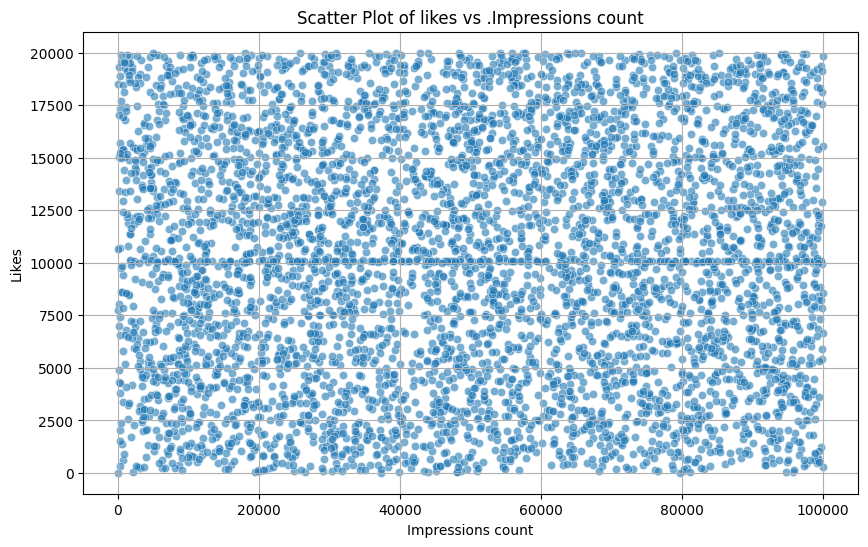

In [47]:
# scatter plot, impressions liks view
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='impression_count',y='likes',data=df,alpha=0.6)
plt.title('Scatter Plot of likes vs .Impressions count')
plt.xlabel('Impressions count')
plt.ylabel('Likes')
plt.grid()
plt.show()

**Line**

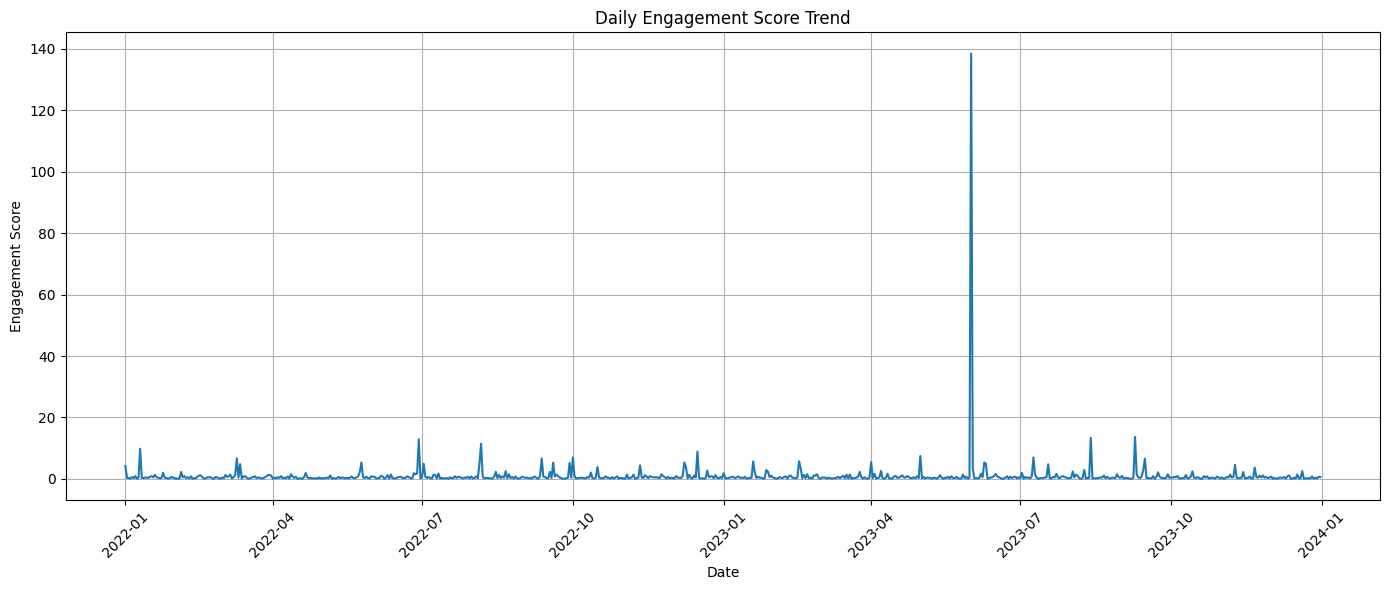

In [48]:
# line plot daily engagement trend
# extract date from'posted_at' and calculate daily total engagement score
df['post_date']=df['posted_at'].dt.date
daily_engagement=df.groupby('post_date')['engagement_score'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=daily_engagement,x='post_date',y='engagement_score')
plt.title('Daily Engagement Score Trend')
plt.xlabel('Date')
plt.ylabel('Engagement Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Bar**

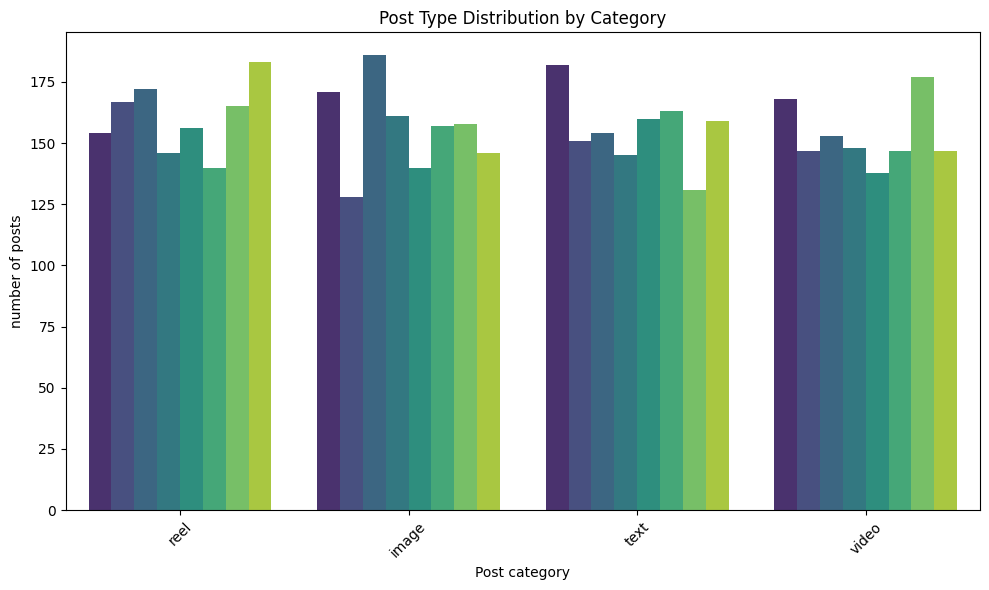

In [49]:
# bar plot by category
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='post_type',hue='post_category',palette='viridis',order=df['post_type'].value_counts().index,legend=False)
plt.title('Post Type Distribution by Category')
plt.xlabel('Post category')
plt.ylabel('number of posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**pie**

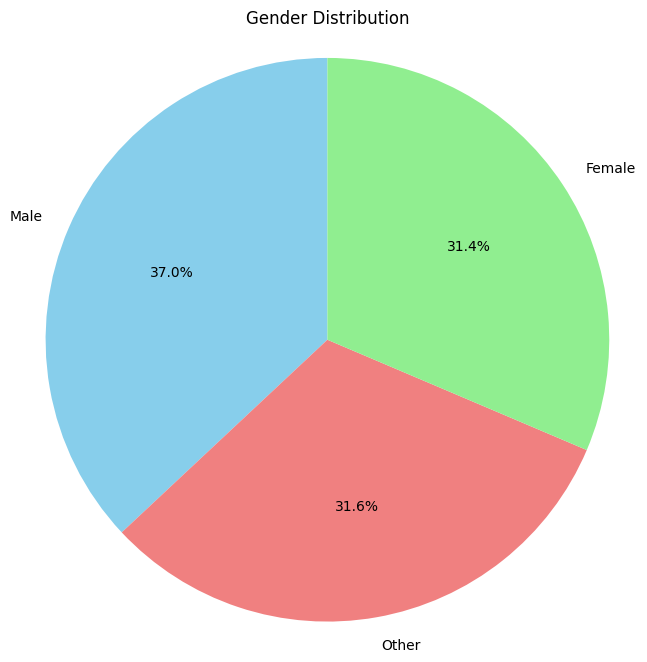

In [50]:
# pie chart gender distribution
gender_counts=df['gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=90,colors=['skyblue','lightcoral','lightgreen'])
plt.title('Gender Distribution')
plt.axis('equal')#equal aspect ratio ensures that pie is drawn as circle.
plt.show()

**Histogram**

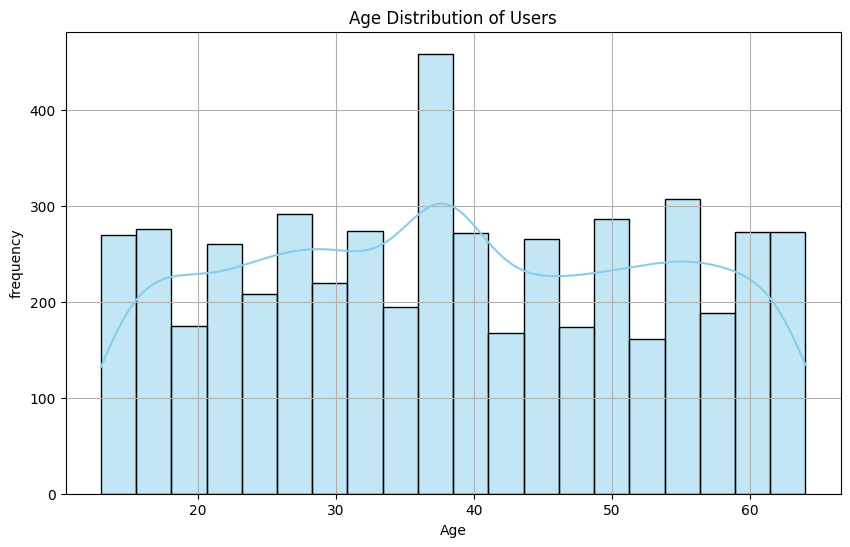

In [51]:
# histogram age distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='age',bins=20,color='skyblue',kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

**Box**

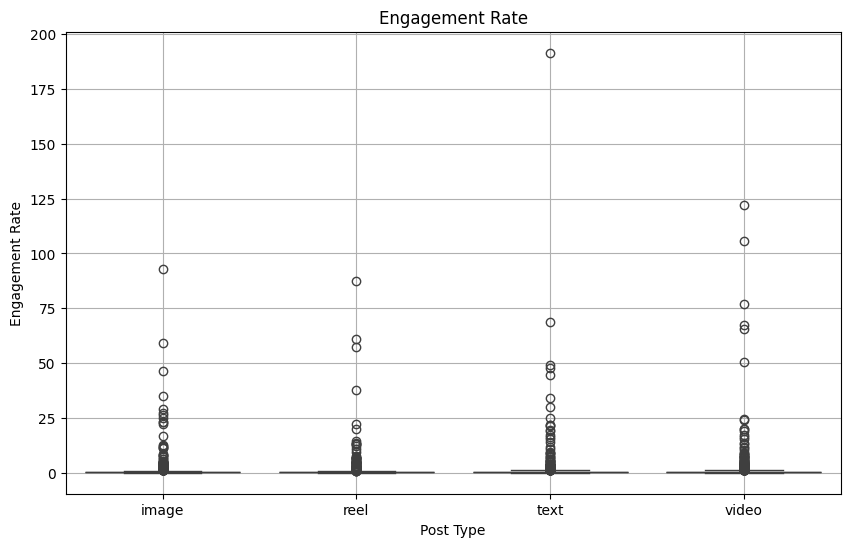

In [52]:
# box plot engagement rate
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='post_type',y='engagement_rate')
plt.title('Engagement Rate')
plt.xlabel('Post Type')
plt.ylabel('Engagement Rate')
plt.grid(True)
plt.show()

**Seaborn**

**Count Plot**

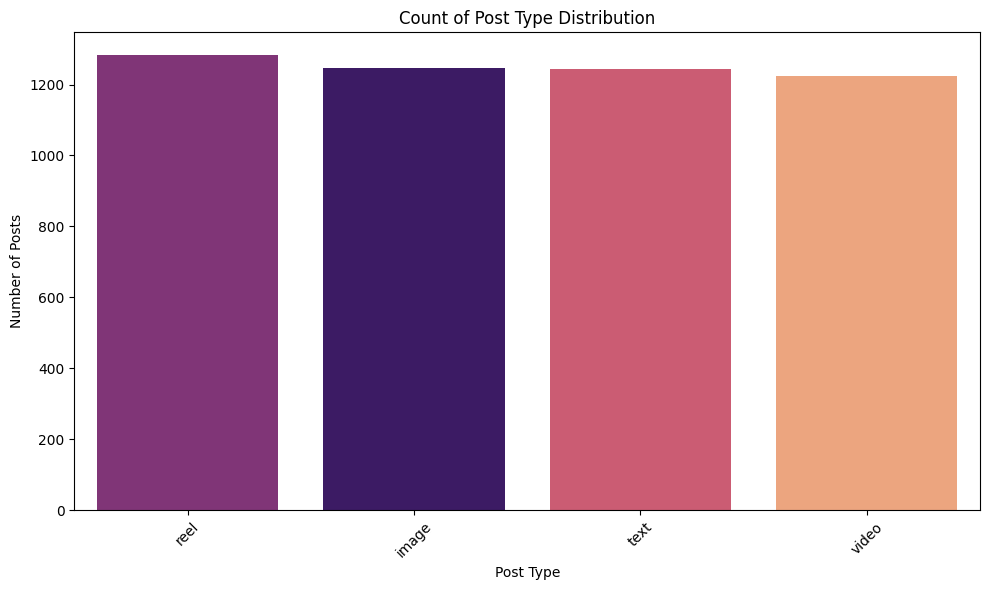

In [53]:
# count plot post type
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='post_type',hue='post_type',palette='magma',order=df['post_type'].value_counts().index,legend=False)
plt.title('Count of Post Type Distribution')
plt.xlabel('Post Type')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Violin plot**

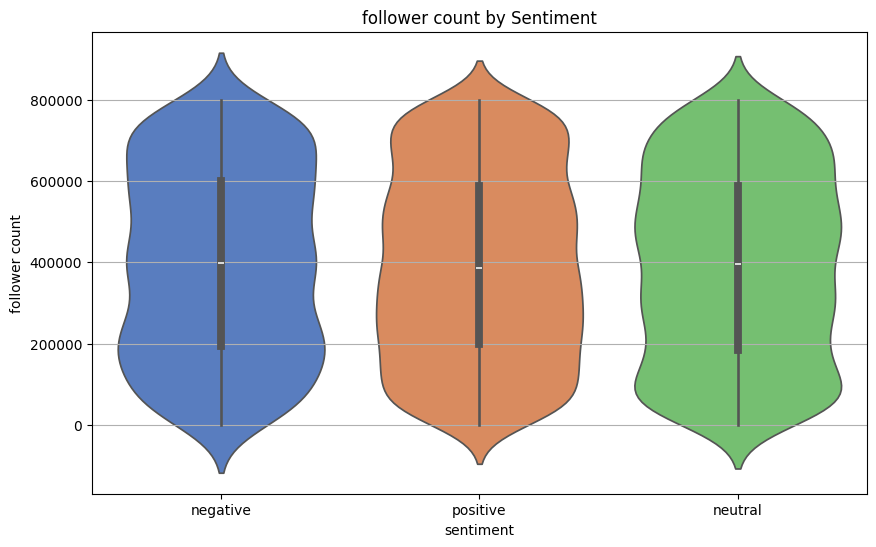

In [54]:
# violin plot
plt.figure(figsize=(10,6))
sns.violinplot(data=df,x='sentiment',y='follower_count',hue='sentiment',palette='muted',legend=False)
plt.title('follower count by Sentiment')
plt.xlabel('sentiment')
plt.ylabel('follower count')
plt.grid(axis='y')
plt.show()

**Pair Plot**

In [55]:
# pair plot numeric features
import seaborn as sns
import matplotlib.pyplot as plt
# select numeric columns only
numeric_df=df.select_dtypes(include=['number'])

# drop id columns not useful for analysis
numeric_df=numeric_df.drop(columns=['user_id','post_id'])

# create pair plot
sns.pairplot(numeric_df,diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Features',y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Heatmap**

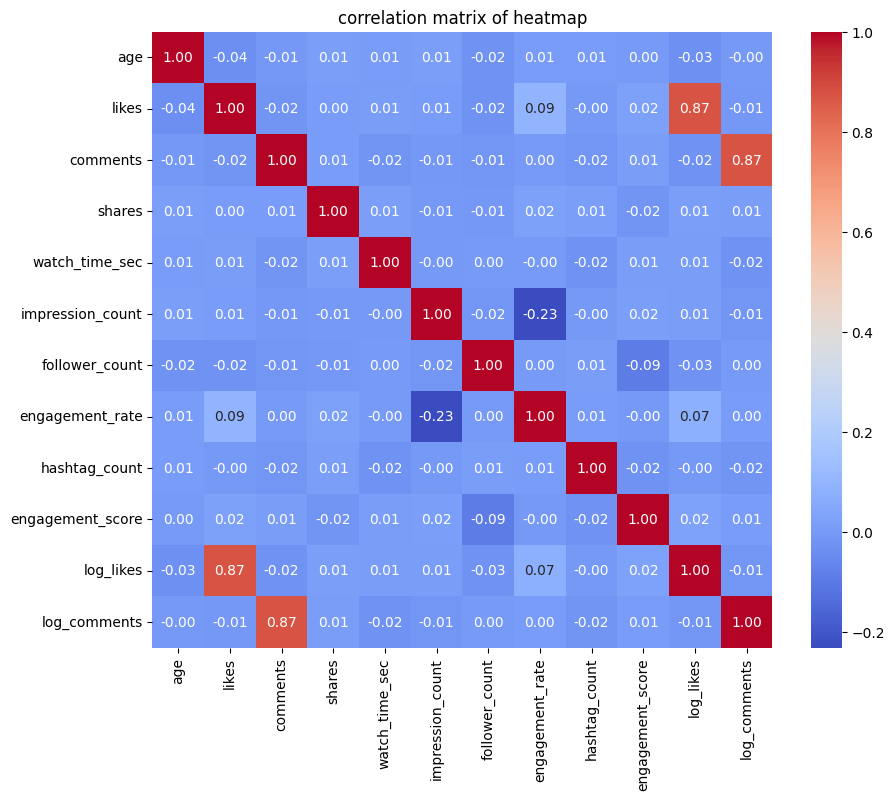

In [56]:
# haetmap correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
#  correlation matrix
correlation_matrix=numeric_df.corr()

# create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation matrix of heatmap')
plt.show()

**Ploty (interactive)**

In [57]:
import plotly.express as px

# interactive line chart=daily engagement trend
# ensure daily engagement dataframe is availabe from previoussteps
# if not,recalculate it :
# df['post date']=df['posted_at'].dt.date
# daily engagement =df.groupby("post_date")["engagement_score"].sum().reset_index()

fig=px.line(daily_engagement,x='post_date',y='engagement_score',title='Daily Engagement Score Trend',
            labels={'post_date':'Date','engagement_score':'Engagement Score'})
fig.update_layout(height=500,width=800)
fig.show()

**Final Insights Following Analysis**

In [58]:
# which post types have the highest engagement
# find the best post type with the highest engagement score
highest_engagement_post_type = avg_engagement_metrics_by_post_type.loc[avg_engagement_metrics_by_post_type['engagement_score'].idxmax()]
print(highest_engagement_post_type)

likes               10188.600000
comments             1479.160000
shares                996.834286
engagement_score        0.239181
Name: video, dtype: float64


In [59]:
# which content category hasthe highest average like
# find the content category with the highest average likes
avg_likes_by_category = df.groupby('post_category')['likes'].mean()
highest_avg_likes_category = avg_likes_by_category.loc[avg_likes_by_category.idxmax()]
print(highest_avg_likes_category)

10225.522765598651


In [60]:
# which countries have the highest avrage engagement rate
# find the country with the highest average engagement score
highest_engagement_country=avg_by_country.loc[avg_by_country['engagement_score'].idxmax()]
print(highest_engagement_country)
print("country with the highest average engagement rate:")

likes               10227.487078
comments             1541.214712
shares                989.075547
engagement_score        0.369635
Name: UAE, dtype: float64
country with the highest average engagement rate:


**User Trends**

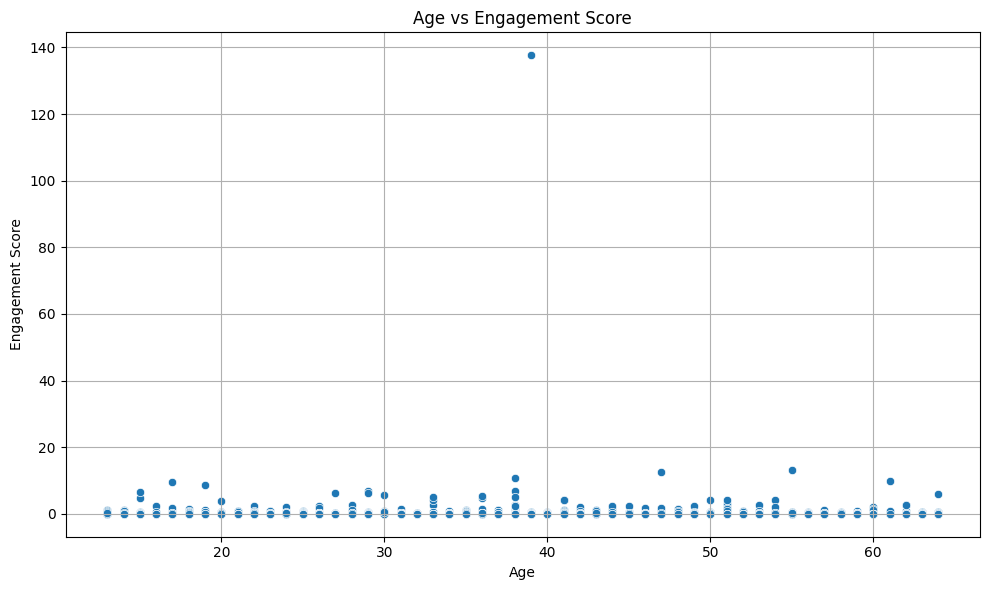

In [61]:
# how age affects engagement
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# create engagement_score if it does nt exist
if 'engagement_score' not in df.columns:
    df['engagement_score']=df['views']*df['likes']+df['dislikes']+5*df['comment_count']+df['follower_count']+df['shares']

# plot how age affects engagements
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='engagement_score',data=df)
plt.title('Age vs Engagement Score')
plt.xlabel('Age')
plt.ylabel('Engagement Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
# performance difference for verified accounts
ave_engagement=df.groupby('is_verified')[['engagement_score','likes','comments','shares']].mean()
print(ave_engagement)

             engagement_score         likes     comments       shares
is_verified                                                          
False                0.149245  10137.201129  1505.511401  1001.599292
True                 0.096491   9824.533126  1469.573499  1015.173913


**Behavioral insights**

In [63]:
# best time of day for impressions
#total impressions with in hour
hourly_impressions=df.groupby(df['posted_at'].dt.hour)['impression_count'].sum()
print("impressions by hour:")
print(hourly_impressions)

impressions by hour:
posted_at
0    250068664
Name: impression_count, dtype: int64


In [64]:
# device type impact on watch time
# average watch time by device type
avg_watch_time = df.groupby('device_type')['watch_time_sec'].mean()
print("avearge watch time by device type:")
print(avg_watch_time)

avearge watch time by device type:
device_type
desktop    3974.792521
mobile     4087.830760
tablet     3979.736429
Name: watch_time_sec, dtype: float64


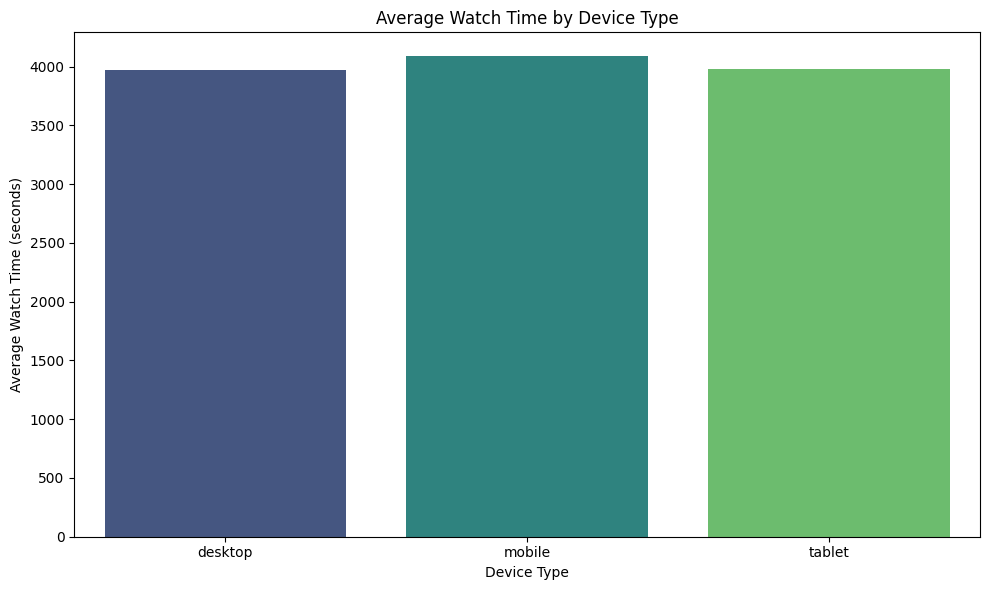

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=avg_watch_time.index,y=avg_watch_time.values,hue=avg_watch_time.index,palette='viridis',legend=False)

plt.title('Average Watch Time by Device Type')
plt.xlabel('Device Type')
plt.ylabel ('Average Watch Time (seconds)')
plt.tight_layout()
plt.show()

**Sentiment Analysis**

In [66]:
# which sentiment performs best
# create engagement_score
df['engagement_score']=df['likes']+df['comments']+df['shares']/df['follower_count']

# average engagement by sentiment
avg_by_sentiment=df.groupby('sentiment')['engagement_score'].mean()

# sentiment with highest score
sentiment_with_highest_score=avg_by_sentiment.idxmax()

print("sentiment with the highest average engagement score:")
print(sentiment_with_highest_score)

sentiment with the highest average engagement score:
negative


In [67]:
# behavior of negative neutral sentiment posts
# average engagemts for selected sentiments
avg_engagement_by_sentiment=df[df['sentiment'].isin(['negative','neutral'])].groupby('sentiment')['engagement_score'].mean()
print("average engagement metrics (negative neutral ):")
print(avg_engagement_by_sentiment)

average engagement metrics (negative neutral ):
sentiment
negative    11724.204965
neutral     11451.608643
Name: engagement_score, dtype: float64


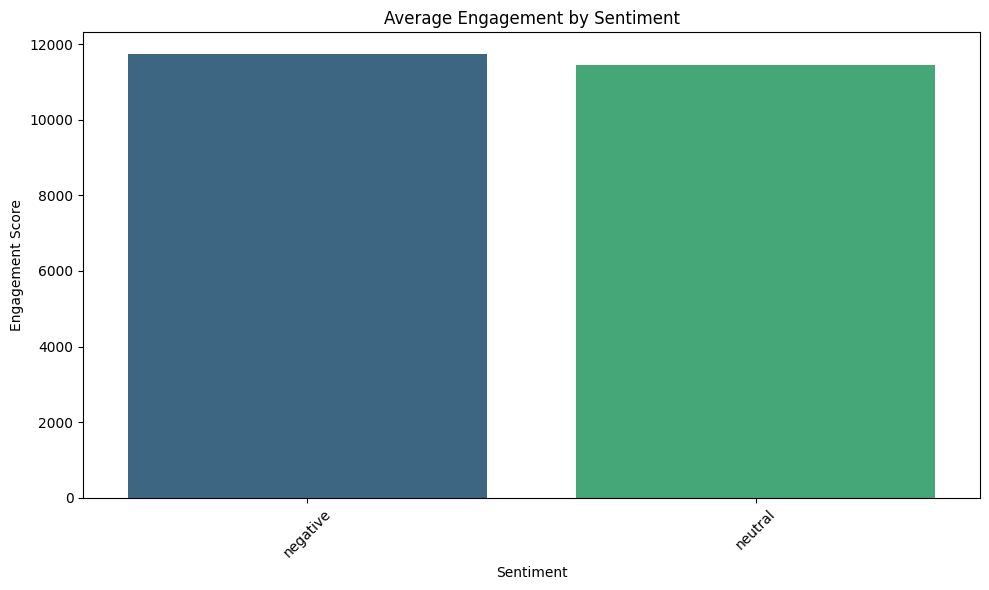

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
# prepare data for plotting
plot_df=avg_engagement_by_sentiment.reset_index()

# create bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=plot_df,x='sentiment',y='engagement_score',hue='sentiment',palette='viridis',legend=False)
plt.title('Average Engagement by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()